In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# **1. Loading Dataset**

In [2]:
# Loading the data
new_data = pd.read_csv("/kaggle/input/seperated-data/India_Delhi.csv")

# print the shape
print(new_data.shape)

#runs the first 5 rows
new_data.head()

(2399, 12)


,Date,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
0,2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,NaN,NaN,NaN,NaN,India_Delhi
1,2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,NaN,NaN,NaN,NaN,India_Delhi
2,2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,NaN,NaN,NaN,NaN,India_Delhi
3,2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,NaN,NaN,NaN,NaN,India_Delhi
4,2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,NaN,NaN,NaN,NaN,India_Delhi


In [3]:
# Find the minimum and maximum dates
min_date = new_data['Date'].min()
max_date = new_data['Date'].max()

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date: 2014-12-29
Maximum date: 2023-10-01


In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2399 non-null   object 
 1   co            2399 non-null   float64
 2   no2           2399 non-null   float64
 3   o3            2399 non-null   float64
 4   pm10          2398 non-null   float64
 5   pm25          2398 non-null   float64
 6   so2           2399 non-null   float64
 7   humidity      1698 non-null   float64
 8   pressure      1698 non-null   float64
 9   temperature   1698 non-null   float64
 10  wind-speed    1629 non-null   float64
 11  Country_City  2399 non-null   object 
dtypes: float64(10), object(2)
memory usage: 225.0+ KB


In [5]:
new_data.describe()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed
count,2399.000000,2399.000000,2399.000000,2398.000000,2398.000000,2399.000000,1698.000000,1698.000000,1698.000000,1629.000000
mean,9.325594,16.870946,9.480700,131.572143,164.397832,5.702751,60.708304,985.184923,26.338869,1.101964
std,3.715709,7.805715,4.829603,77.174642,64.829240,2.289821,17.138084,10.022854,6.631277,0.493156
min,0.100000,5.000000,2.400000,12.000000,30.000000,1.700000,13.000000,743.000000,6.200000,0.300000
25%,7.050000,10.600000,6.000000,82.000000,123.000000,4.000000,48.500000,979.800000,22.100000,0.800000
50%,8.400000,15.800000,8.200000,120.000000,160.000000,5.300000,63.000000,983.900000,28.600000,1.000000
75%,10.700000,21.500000,11.800000,160.000000,189.000000,7.100000,74.000000,990.400000,31.100000,1.300000
max,30.600000,66.500000,40.300000,999.000000,577.000000,19.800000,99.100000,1020.500000,38.000000,4.600000


In [6]:
# Investigate all the elements whithin each Feature

for column in new_data:
    # Handle numerical and string columns differently
    if new_data[column].dtype == 'object':  # Check if column is of object type
        unique_vals = new_data[column].unique()  # pandas unique for strings
    else:
        unique_vals = np.unique(new_data[column])  # numpy unique for numerical types

    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :2397
The number of values for feature co :200
The number of values for feature no2 :328
The number of values for feature o3 :226
The number of values for feature pm10 :320
The number of values for feature pm25 :309
The number of values for feature so2 :116
The number of values for feature humidity :602
The number of values for feature pressure :300
The number of values for feature temperature :264
The number of values for feature wind-speed :33
The number of values for feature Country_City :1 -- ['India_Delhi']


In [7]:
new_data.isna().sum()

Date              0
co                0
no2               0
o3                0
pm10              1
pm25              1
so2               0
humidity        701
pressure        701
temperature     701
wind-speed      770
Country_City      0
dtype: int64

## **1.2 - Function**

In [8]:
print(os.listdir('/kaggle/usr/lib/function'))

['__results__.html', '__notebook__.ipynb', 'function.py', '__output__.json', 'custom.css']


In [9]:
import sys
sys.path.append("/kaggle/usr/lib/function")  # Add directory to the path

import function as fn

In [10]:
# Use the functions
new_data1 = fn.prepare_datetime_index(new_data, date_column='Date')
new_data1.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
Date,,,,,,,,,,,
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,NaN,NaN,NaN,NaN,India_Delhi
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,NaN,NaN,NaN,NaN,India_Delhi
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,NaN,NaN,NaN,NaN,India_Delhi
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,NaN,NaN,NaN,NaN,India_Delhi
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,NaN,NaN,NaN,NaN,India_Delhi


In [11]:
# Use the functions
new_data2 = fn.fill_pollutant_values(new_data1)
print(new_data2.isna().sum())

co              0
no2             0
o3              0
pm10            0
pm25            0
so2             0
humidity        0
pressure        0
temperature     0
wind-speed      0
Country_City    0
dtype: int64


**Check**

In [12]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data2.index.min(), end=new_data2.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data2.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex(['2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
               '2015-07-10', '2015-07-11', '2015-07-12', '2015-07-13',
               '2015-07-14', '2015-07-15',
               ...
               '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21',
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27'],
              dtype='datetime64[ns]', length=802, freq=None)


In [13]:
new_data3 = fn.impute_missing_dates(new_data2)

In [14]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data3.index.min(), end=new_data3.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data3.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [15]:
duplicates = new_data3.index[new_data3.index.duplicated()]
print(f"Duplicate indexes: {duplicates}")

Duplicate indexes: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


## **1.3.Normal AQI count, After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling), (Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi).**

In [16]:
new_data4 = fn.calculate_aqi(new_data3, subindex_columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])

In [17]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0


In [18]:
new_data4.shape

(3199, 13)

 After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling)

In [19]:
# Apply the outlier handling function to the 'AQI' column only
new_data4['AQI_smoothed_iqr'] = fn.handle_aqi_outliers(new_data4['AQI'], method='iqr')
new_data4['AQI_smoothed_zscore'] = fn.handle_aqi_outliers(new_data4['AQI'], method='zscore')
new_data4['AQI_smoothed_rolling'] = fn.handle_aqi_outliers(new_data4['AQI'], method='rolling')

In [20]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0


(Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi)

In [21]:
new_smooth = fn.calculate_smooth_aqi(new_data3, columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])
new_smooth.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,AQI_Smooth
2014-12-29,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2014-12-30,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2014-12-31,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2015-01-01,11.50,29.400000,5.366667,182.333333,195.666667,6.000000,60.691097,985.187382,26.3352,1.102459,India_Delhi,195.666667
2015-01-02,11.25,26.616667,5.816667,166.000000,177.000000,5.733333,60.691097,985.187382,26.3352,1.102459,India_Delhi,177.000000


**AQI (normal, smooth_iqr, smooth_zscore, smooth_rolling, smooth)**

<Axes: >

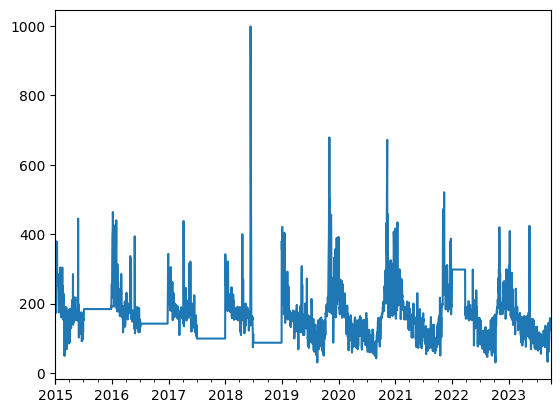

In [22]:
#normal
aqi_normal = new_data4['AQI']
aqi_normal.plot()

<Axes: >

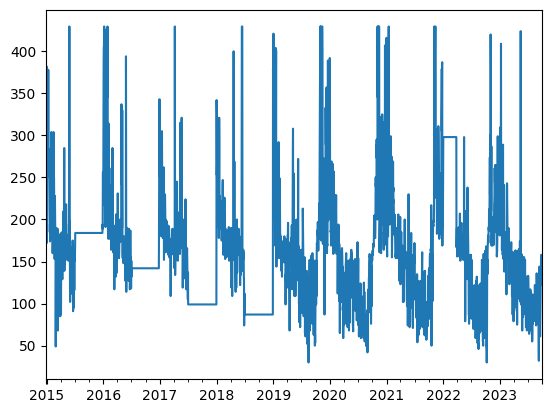

In [23]:
#smooth_iqr
aqi_smooth_iqr = new_data4['AQI_smoothed_iqr']
aqi_smooth_iqr.plot()

<Axes: >

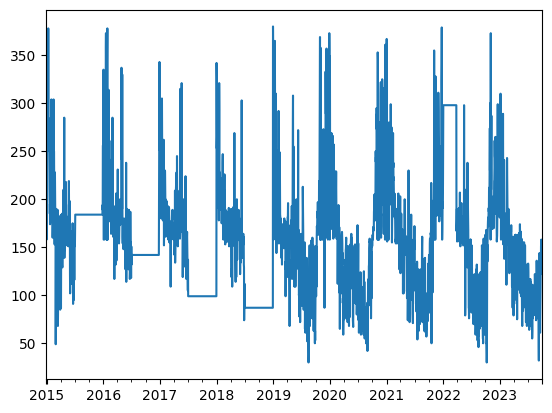

In [24]:
#smooth_zscore
aqi_smooth_zscore = new_data4['AQI_smoothed_zscore']
aqi_smooth_zscore.plot()

<Axes: >

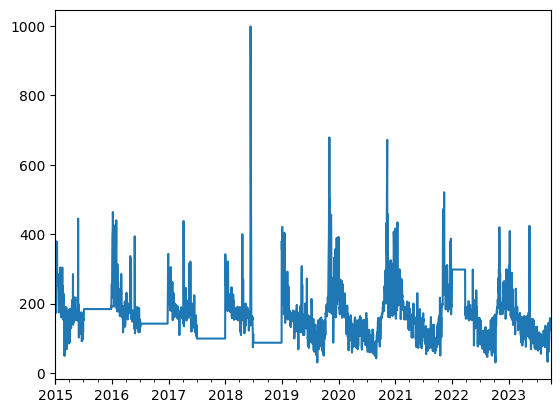

In [25]:
#smooth_rolling
aqi_smooth_rolling = new_data4['AQI_smoothed_rolling']
aqi_smooth_rolling.plot()

<Axes: >

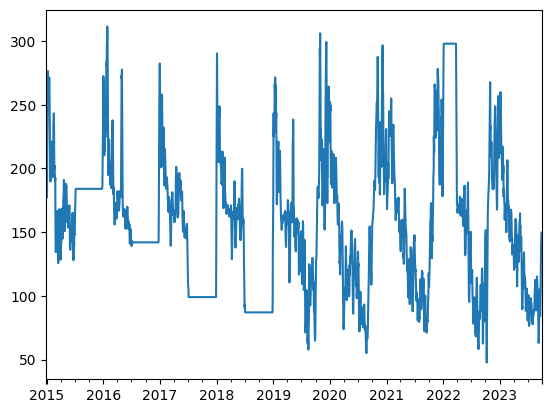

In [26]:
#smooth
aqi_smooth = new_smooth['AQI_Smooth']
aqi_smooth.plot()

# **2.1. Splitting & Preprocessing the Raw Data(AQI_Smooth)**

Smooth AQI(All Pollutants)

In [27]:
new_data4.head(8)

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,307.0,307.0,307.0,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,367.0,367.0,367.0,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,202.0,202.0,202.0,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,382.0,382.0,158.0,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,172.0,172.0,172.0,172.0
2015-01-03,14.3,27.8,5.2,98.0,179.0,5.6,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,179.0,179.0,179.0,179.0
2015-01-04,12.6,19.5,5.9,120.0,195.0,2.6,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,195.0,195.0,195.0,195.0
2015-01-05,13.1,19.1,8.4,114.0,185.0,2.5,60.691097,985.187382,26.3352,1.102459,India_Delhi,6,185.0,185.0,185.0,185.0


In [28]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],
      dtype='object')

In [29]:
aqi_normal = new_data4.copy()

In [30]:
aqi_normal = aqi_normal.drop([ 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 
        'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'], axis = 1)

In [31]:
aqi_normal.head()

,co,no2,o3,pm10,pm25,so2,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,172.0


In [32]:
def new_data_to_X_y(new_data, window_size, train_pct, val_pct, test_pct):
    
    new_data_as_np = new_data.to_numpy()
    
    # Split features and target
    features = new_data_as_np[:, :-1]  # All columns except the last one
    target = new_data_as_np[:, -1]     # Only the AQI column
    
    # Split data based on percentages
    total_len = len(features)
    train_end = int(train_pct * total_len)
    val_end = train_end + int(val_pct * total_len)
    
    # Prepare train, val, and test splits for both features and target
    train_features = features[:train_end]
    train_target = target[:train_end]
    
    val_features = features[train_end:val_end]
    val_target = target[train_end:val_end]
    
    test_features = features[val_end:]
    test_target = target[val_end:]
    
    # Helper function to create X and y
    def create_X_y(feature_data, target_data):
        X, y = [], []
        for i in range(len(feature_data) - window_size):
            # Create sequence of all features
            sequence = feature_data[i:i + window_size]
            X.append(sequence)
            # Get the target AQI value
            y.append(target_data[i + window_size])
        return np.array(X), np.array(y)
    
    
    X_train, y_train = create_X_y(train_features, train_target)
    X_val, y_val = create_X_y(val_features, val_target)
    X_test, y_test = create_X_y(test_features, test_target)
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [33]:
WINDOW_SIZE = 6
NUM_FEATURES = 5
train_pct = 0.8
val_pct = 0.1
test_pct = 0.1

(X_train1, y_train1), (X_val1, y_val1), (X_test1, y_test1) = new_data_to_X_y(
    aqi_normal, WINDOW_SIZE, train_pct, val_pct, test_pct)

In [34]:
# shapes
print("Train shapes:", X_train1.shape, y_train1.shape)
print("Validation shapes:", X_val1.shape, y_val1.shape)
print("Test shapes:", X_test1.shape, y_test1.shape)

Train shapes: (2553, 6, 6) (2553,)
Validation shapes: (313, 6, 6) (313,)
Test shapes: (315, 6, 6) (315,)


# **2.2. Model Training & Testing**

In [35]:
# libraries for building model and testing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# LSTM(Normal)(Learning Rate Test)

## Model 1

In [36]:
model1 = Sequential()
model1.add(InputLayer((6, 6))) # 6 timestamp , 6 feature
model1.add(LSTM(16)) 
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, 'linear')) 

#model1.summary()

cp1 = ModelCheckpoint('/kaggle/working/model1.keras', save_best_only=True)

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), 
               metrics=[RootMeanSquaredError()])

model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp1])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 29181.6855 - root_mean_squared_error: 170.6217 - val_loss: 22183.3809 - val_root_mean_squared_error: 148.9409
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10997.3809 - root_mean_squared_error: 104.6175 - val_loss: 8098.6304 - val_root_mean_squared_error: 89.9924
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4620.2310 - root_mean_squared_error: 67.8619 - val_loss: 6759.2134 - val_root_mean_squared_error: 82.2144
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4528.9038 - root_mean_squared_error: 67.1264 - val_loss: 5963.8311 - val_root_mean_squared_error: 77.2258
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3829.7871 - root_mean_squared_error: 61.8082 - val_loss: 6209.9883 - val_root_mean_squared_error: 78.8035
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3109.4434 - root_mean_squared_error: 55.6937 - val_loss: 3634.3398 - val_root_mean_squared_error: 60.2855
Epoch 7/50

In [37]:
from tensorflow.keras.models import load_model
model1 = load_model('/kaggle/working/model1.keras')

In [38]:
# Evaluate the model on the train data
train_result = model1.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 26.6454
Mean Squared Error (MSE): 2091.7525
Root Mean Squared Error (RMSE): 45.7357
R-squared (Accuracy): 0.5949


In [39]:
# Evaluate the model on the validation data
val_result = model1.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 21.5673
Mean Squared Error (MSE): 902.6669
Root Mean Squared Error (RMSE): 30.0444
R-squared (Accuracy): 0.8786


In [40]:
# Evaluate the model on the test data
test_result = model1.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 27.9885
Mean Squared Error (MSE): 1579.4358
Root Mean Squared Error (RMSE): 39.7421
R-squared (Accuracy): 0.5220


## Model 2

In [41]:
model2 = Sequential()
model2.add(InputLayer((6, 6))) # 6 timestamp , 6 feature
model2.add(LSTM(16)) 
model2.add(Dense(8, activation='relu')) 
model2.add(Dense(1, 'linear'))

#model1.summary()

cp2 = ModelCheckpoint('/kaggle/working/model2.keras', save_best_only=True)

model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), 
               metrics=[RootMeanSquaredError()])

model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp2])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 32387.2812 - root_mean_squared_error: 179.9450 - val_loss: 39638.7969 - val_root_mean_squared_error: 199.0949
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30257.0723 - root_mean_squared_error: 173.9081 - val_loss: 39598.8164 - val_root_mean_squared_error: 198.9945
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30799.7969 - root_mean_squared_error: 175.4691 - val_loss: 39512.3594 - val_root_mean_squared_error: 198.7772
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30944.3750 - root_mean_squared_error: 175.8787 - val_loss: 39319.1680 - val_root_mean_squared_error: 198.2906
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30194.8672 - root_mean_squared_error: 173.7488 - val_loss: 39136.4414 - val_root_mean_squared_error: 197.8293
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30414.3301 - root_mean_squared_error: 174.3913 - val_loss: 38976.4297 - val_root_mean_squared_error: 1

In [42]:
from tensorflow.keras.models import load_model
model2 = load_model('/kaggle/working/model2.keras')

In [43]:
# Evaluate the model on the train data
train_result = model2.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 141.4285
Mean Squared Error (MSE): 25186.3371
Root Mean Squared Error (RMSE): 158.7020
R-squared (Accuracy): -3.8774


In [44]:
# Evaluate the model on the validation data
val_result = model2.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 158.9064
Mean Squared Error (MSE): 32727.1269
Root Mean Squared Error (RMSE): 180.9064
R-squared (Accuracy): -3.3999


In [45]:
# Evaluate the model on the test data
test_result = model2.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 124.5426
Mean Squared Error (MSE): 18832.6984
Root Mean Squared Error (RMSE): 137.2323
R-squared (Accuracy): -4.6991


## Model 3

In [46]:
model3 = Sequential()
model3.add(InputLayer((6, 6))) # 6 timestamp , 6 feature
model3.add(LSTM(16)) 
model3.add(Dense(8, activation='relu')) 
model3.add(Dense(1, 'linear'))

#model1.summary()

cp3 = ModelCheckpoint('/kaggle/working/model3.keras', save_best_only=True)

model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp3])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 32088.2441 - root_mean_squared_error: 179.0999 - val_loss: 38839.1719 - val_root_mean_squared_error: 197.0766
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31896.2793 - root_mean_squared_error: 178.4674 - val_loss: 37027.8242 - val_root_mean_squared_error: 192.4261
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30202.2168 - root_mean_squared_error: 173.7213 - val_loss: 34308.8789 - val_root_mean_squared_error: 185.2266
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27288.1875 - root_mean_squared_error: 165.0931 - val_loss: 31579.5078 - val_root_mean_squared_error: 177.7062
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23450.4141 - root_mean_squared_error: 153.1242 - val_loss: 28652.1699 - val_root_mean_squared_error: 169.2695
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20527.1836 - root_mean_squared_error: 143.2436 - val_loss: 25329.6777 - val_root_mean_squared_error: 

In [47]:
from tensorflow.keras.models import load_model
model3 = load_model('/kaggle/working/model3.keras')

In [48]:
# Evaluate the model on the train data
train_result = model3.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 20.7655
Mean Squared Error (MSE): 1679.9232
Root Mean Squared Error (RMSE): 40.9869
R-squared (Accuracy): 0.6747


In [49]:
# Evaluate the model on the validation data
val_result = model3.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 19.5212
Mean Squared Error (MSE): 712.3836
Root Mean Squared Error (RMSE): 26.6905
R-squared (Accuracy): 0.9042


In [50]:
# Evaluate the model on the test data
test_result = model3.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 23.6362
Mean Squared Error (MSE): 1202.2686
Root Mean Squared Error (RMSE): 34.6737
R-squared (Accuracy): 0.6362


## Model 4

In [51]:
model4 = Sequential()
model4.add(InputLayer((6, 6))) # 6 timestamp , 6 feature
model4.add(LSTM(16)) 
model4.add(Dense(8, activation='relu')) 

model4.add(Dense(1, 'linear')) 

#model1.summary()

cp4 = ModelCheckpoint('/kaggle/working/model4.keras', save_best_only=True)

model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[RootMeanSquaredError()])

model4.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp4])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 31606.0195 - root_mean_squared_error: 177.7506 - val_loss: 39357.8555 - val_root_mean_squared_error: 198.3881
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29991.6465 - root_mean_squared_error: 173.1510 - val_loss: 38775.3047 - val_root_mean_squared_error: 196.9145
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30398.7422 - root_mean_squared_error: 174.3442 - val_loss: 38038.8984 - val_root_mean_squared_error: 195.0356
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30127.5566 - root_mean_squared_error: 173.5580 - val_loss: 37408.5859 - val_root_mean_squared_error: 193.4130
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28916.5410 - root_mean_squared_error: 170.0199 - val_loss: 36758.8320 - val_root_mean_squared_error: 191.7259
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27802.9121 - root_mean_squared_error: 166.6921 - val_loss: 35516.9570 - val_root_mean_squared_error: 1

In [52]:
from tensorflow.keras.models import load_model
model4 = load_model('/kaggle/working/model4.keras')

In [53]:
# Evaluate the model on the train data
train_result = model4.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 25.1743
Mean Squared Error (MSE): 2438.3981
Root Mean Squared Error (RMSE): 49.3801
R-squared (Accuracy): 0.5278


In [54]:
# Evaluate the model on the validation data
val_result = model4.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 40.1406
Mean Squared Error (MSE): 2725.7132
Root Mean Squared Error (RMSE): 52.2084
R-squared (Accuracy): 0.6335


In [55]:
# Evaluate the model on the test data
test_result = model4.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 25.9000
Mean Squared Error (MSE): 1307.5073
Root Mean Squared Error (RMSE): 36.1595
R-squared (Accuracy): 0.6043


# Model Testing(Simple, Complex, Hybrid)

## Model 5: Basic LSTM Model

In [56]:
model5 = Sequential()
model5.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model5.add(LSTM(32, activation='relu', return_sequences=False))  # Single LSTM layer
model5.add(Dense(16, activation='relu')) 
model5.add(Dense(1, activation='linear'))  

cp5 = ModelCheckpoint('/kaggle/working/model5.keras', save_best_only=True)

model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model5.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp5])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 24772.0059 - root_mean_squared_error: 155.9476 - val_loss: 1449.2964 - val_root_mean_squared_error: 38.0696
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1958.4347 - root_mean_squared_error: 44.1484 - val_loss: 1043.4269 - val_root_mean_squared_error: 32.3021
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1467.1948 - root_mean_squared_error: 38.1465 - val_loss: 940.1871 - val_root_mean_squared_error: 30.6625
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1754.3727 - root_mean_squared_error: 41.7121 - val_loss: 1051.3237 - val_root_mean_squared_error: 32.4241
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1616.8647 - root_mean_squared_error: 40.1889 - val_loss: 824.3160 - val_root_mean_squared_error: 28.7109
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1691.4365 - root_mean_squared_error: 41.0220 - val_loss: 867.4623 - val_root_mean_squared_error: 29.4527
Epoch 7/50
80/80 

In [57]:
from tensorflow.keras.models import load_model
model5 = load_model('/kaggle/working/model5.keras')

In [58]:
# Evaluate the model on the train data
train_result = model5.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 19.8110
Mean Squared Error (MSE): 1533.5035
Root Mean Squared Error (RMSE): 39.1600
R-squared (Accuracy): 0.7030


In [59]:
# Evaluate the model on the validation data
val_result = model5.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 17.0043
Mean Squared Error (MSE): 745.1856
Root Mean Squared Error (RMSE): 27.2981
R-squared (Accuracy): 0.8998


In [60]:
# Evaluate the model on the test data
test_result = model5.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 21.1344
Mean Squared Error (MSE): 1090.5179
Root Mean Squared Error (RMSE): 33.0230
R-squared (Accuracy): 0.6700


## Model 6: GRU Model with Dropout

In [61]:
model6 = Sequential()
model6.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model6.add(BatchNormalization())  # Normalize inputs
model6.add(GRU(64, activation='relu', return_sequences=True))  # GRU layer
model6.add(Dropout(0.3))  # Dropout for regularization
model6.add(Dense(32, activation='relu'))  
model6.add(Dense(1, activation='linear'))  

cp6 = ModelCheckpoint('/kaggle/working/model6.keras', save_best_only=True)

model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model6.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp6])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 30607.7188 - root_mean_squared_error: 174.8166 - val_loss: 21226.4883 - val_root_mean_squared_error: 145.6931
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 17783.9824 - root_mean_squared_error: 133.2335 - val_loss: 14474.1689 - val_root_mean_squared_error: 120.3086
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 10161.7549 - root_mean_squared_error: 100.7827 - val_loss: 12541.0107 - val_root_mean_squared_error: 111.9867
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8977.2324 - root_mean_squared_error: 94.6801 - val_loss: 11730.4453 - val_root_mean_squared_error: 108.3072
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7376.3398 - root_mean_squared_error: 85.8499 - val_loss: 10654.3877 - val_root_mean_squared_error: 103.2201
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6936.2822 - root_mean_squared_error: 83.2543 - val_loss: 10207.1514 - val_root_mean_squared_error: 101.03

## Model 7: Bidirectional LSTM

In [62]:
model7 = Sequential()
model7.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model7.add(BatchNormalization())  # Normalize inputs
model7.add(GRU(64, activation='relu', return_sequences=True))  # GRU layer
model7.add(Dropout(0.3)) 
model7.add(Dense(32, activation='relu'))  
model7.add(Dense(1, activation='linear'))  

cp7 = ModelCheckpoint('/kaggle/working/model7.keras', save_best_only=True)

model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model6.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp7])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5082.6069 - root_mean_squared_error: 71.2542 - val_loss: 7581.1636 - val_root_mean_squared_error: 87.0699
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5131.3438 - root_mean_squared_error: 71.5972 - val_loss: 7635.0625 - val_root_mean_squared_error: 87.3788
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4787.5547 - root_mean_squared_error: 69.1223 - val_loss: 7640.1787 - val_root_mean_squared_error: 87.4081
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5533.4795 - root_mean_squared_error: 74.3107 - val_loss: 7856.4727 - val_root_mean_squared_error: 88.6367
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5549.4692 - root_mean_squared_error: 74.2460 - val_loss: 7723.8379 - val_root_mean_squared_error: 87.8854
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4527.3154 - root_mean_squared_error: 67.1430 - val_loss: 7758.6504 - val_root_mean_squared_error: 88.0832
Epoch 7/50
80/80

## Model 8: Hybrid CNN + LSTM

In [63]:
model8 = Sequential()
model8.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model8.add(Conv1D(32, kernel_size=2, activation='relu'))  # 1D Convolutional Layer
model8.add(MaxPooling1D(pool_size=2))  # Max Pooling
model8.add(LSTM(64, activation='relu', return_sequences=False))  
model8.add(Dropout(0.3))  
model8.add(Dense(32, activation='relu'))  
model8.add(Dense(1, activation='linear'))  

cp8 = ModelCheckpoint('/kaggle/working/model8.keras', save_best_only=True)

model8.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model8.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp8])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 17430.2129 - root_mean_squared_error: 127.9890 - val_loss: 2255.7544 - val_root_mean_squared_error: 47.4948
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3802.3333 - root_mean_squared_error: 61.5973 - val_loss: 2200.4402 - val_root_mean_squared_error: 46.9089
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3413.9067 - root_mean_squared_error: 58.3276 - val_loss: 1659.9099 - val_root_mean_squared_error: 40.7420
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4011.6331 - root_mean_squared_error: 62.4578 - val_loss: 1886.4049 - val_root_mean_squared_error: 43.4328
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3193.9924 - root_mean_squared_error: 56.3809 - val_loss: 1458.1244 - val_root_mean_squared_error: 38.1854
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3391.8030 - root_mean_squared_error: 58.0621 - val_loss: 2521.0862 - val_root_mean_squared_error: 50.2104
Epoch 7/50
80/

In [64]:
from tensorflow.keras.models import load_model
model8 = load_model('/kaggle/working/model8.keras')

In [65]:
# Evaluate the model on the train data
train_result = model8.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 27.9096
Mean Squared Error (MSE): 2628.8857
Root Mean Squared Error (RMSE): 51.2727
R-squared (Accuracy): 0.4909


In [66]:
# Evaluate the model on the validation data
val_result = model8.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 29.7602
Mean Squared Error (MSE): 1458.1245
Root Mean Squared Error (RMSE): 38.1854
R-squared (Accuracy): 0.8040


In [67]:
# Evaluate the model on the test data
test_result = model8.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 25.6574
Mean Squared Error (MSE): 1365.5155
Root Mean Squared Error (RMSE): 36.9529
R-squared (Accuracy): 0.5868


## Model 9: Advanced Stacked GRU + Dense

In [68]:
model9 = Sequential()
model9.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model9.add(BatchNormalization())  # Normalize inputs
model9.add(GRU(128, activation='relu', return_sequences=True))  # GRU layer
model9.add(Dropout(0.3))  # Dropout for regularization
model9.add(GRU(64, activation='relu', return_sequences=False))  # Second GRU layer
model9.add(Dense(32, activation='relu'))  # Fully connected layer
model9.add(Dense(16, activation='relu'))  # Second dense layer
model9.add(Dense(1, activation='linear'))  # Output layer

cp9 = ModelCheckpoint('/kaggle/working/model9.keras', save_best_only=True)

model9.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model9.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp9])


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 26501.2793 - root_mean_squared_error: 161.5677 - val_loss: 3155.2163 - val_root_mean_squared_error: 56.1713
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3686.9333 - root_mean_squared_error: 60.6746 - val_loss: 1617.6886 - val_root_mean_squared_error: 40.2205
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4158.1528 - root_mean_squared_error: 63.1537 - val_loss: 1742.5537 - val_root_mean_squared_error: 41.7439
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2474.6682 - root_mean_squared_error: 49.6324 - val_loss: 1161.8401 - val_root_mean_squared_error: 34.0858
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2945.9771 - root_mean_squared_error: 54.0185 - val_loss: 1880.2964 - val_root_mean_squared_error: 43.3624
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2507.8213 - root_mean_squared_error: 49.9624 - val_loss: 1202.3606 - val_root_mean_squared_error: 34.6751
Epoch 7/

In [69]:
from tensorflow.keras.models import load_model
model9 = load_model('/kaggle/working/model9.keras')

In [70]:
# Evaluate the model on the train data
train_result = model9.predict(X_train1)

# Calculate metrics

mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 19.5705
Mean Squared Error (MSE): 1432.5065
Root Mean Squared Error (RMSE): 37.8485
R-squared (Accuracy): 0.7226


In [71]:
# Evaluate the model on the validation data
val_result = model9.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 19.2833
Mean Squared Error (MSE): 760.8439
Root Mean Squared Error (RMSE): 27.5834
R-squared (Accuracy): 0.8977


In [72]:
# Evaluate the model on the test data
test_result = model9.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 22.7510
Mean Squared Error (MSE): 1162.8587
Root Mean Squared Error (RMSE): 34.1007
R-squared (Accuracy): 0.6481


In [73]:
train_predictions = model9.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Train Predictions,Actuals
0,224.116898,195.0
1,199.105499,185.0
2,203.824753,208.0
3,233.325882,290.0
4,275.444916,267.0
...,...,...
2548,374.042969,387.0
2549,319.629425,169.0
2550,203.704910,197.0
2551,238.822845,191.0


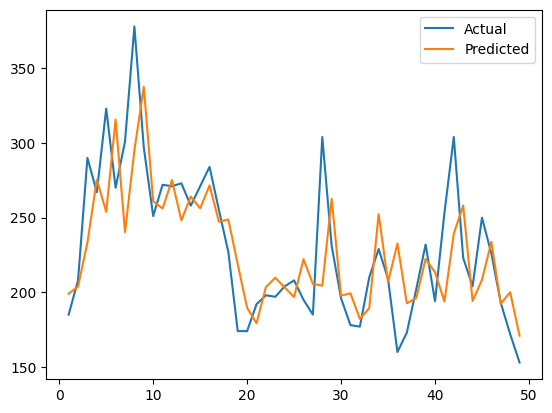

In [74]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [75]:
val_predictions = model9.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,Train Predictions,Actuals
0,287.427338,298.0
1,289.152130,298.0
2,289.032990,298.0
3,289.032990,298.0
4,289.032990,298.0
...,...,...
308,179.034912,193.0
309,229.399673,199.0
310,208.122009,197.0
311,211.338058,197.0


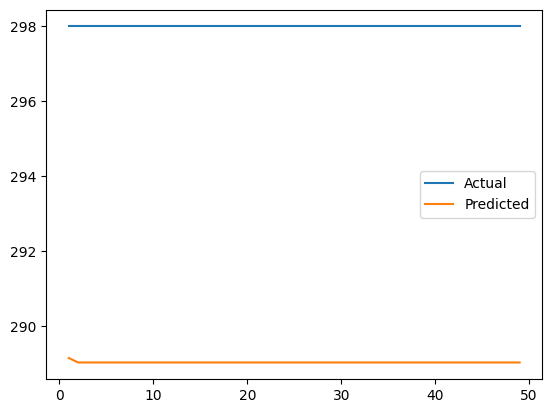

In [76]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [77]:
test_predictions = model9.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,Train Predictions,Actuals
0,209.020432,190.0
1,202.682693,177.0
2,194.499390,172.0
3,195.603638,170.0
4,189.630951,197.0
...,...,...
310,147.632507,134.0
311,146.989944,144.0
312,155.391876,155.0
313,162.992569,155.0


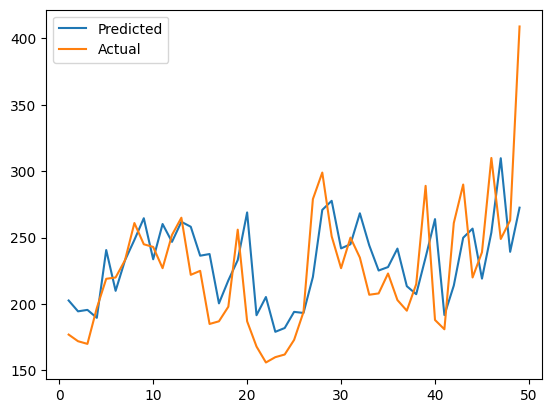

In [78]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

In [79]:
model10 = Sequential()
model10.add(InputLayer((6, 6)))  # Increased sequence length
model10.add(LayerNormalization())  # Better for sequences
model10.add(Bidirectional(GRU(128, activation='tanh', return_sequences=True, recurrent_dropout=0.2)))
model10.add(Dropout(0.3))
model10.add(Bidirectional(GRU(64, activation='tanh', recurrent_dropout=0.2)))
model10.add(Dense(1, activation='linear'))  # Simplified output

optimizer = Adam(learning_rate=0.001, clipvalue=0.5)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
cp10 = ModelCheckpoint('/kaggle/working/model10.keras', save_best_only=True)

model10.compile(loss=MeanSquaredError(), optimizer=optimizer, metrics=[RootMeanSquaredError()])



model10.fit(
    X_train1, y_train1,
    validation_data=(X_val1, y_val1),
    epochs=100,  # Train longer with early stopping
    batch_size=64,
    callbacks=[cp10, lr_scheduler, early_stopping]
)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 27808.2227 - root_mean_squared_error: 166.7077 - val_loss: 34077.3867 - val_root_mean_squared_error: 184.6006 - learning_rate: 0.0010
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 20771.4180 - root_mean_squared_error: 144.0622 - val_loss: 32187.9512 - val_root_mean_squared_error: 179.4100 - learning_rate: 0.0010
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 15832.0205 - root_mean_squared_error: 125.8011 - val_loss: 30503.4980 - val_root_mean_squared_error: 174.6525 - learning_rate: 0.0010
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 14381.7764 - root_mean_squared_error: 119.8794 - val_loss: 28954.1914 - val_root_mean_squared_error: 170.1593 - learning_rate: 0.0010
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 11285.5684 - root_mean_squared_error: 106.2093 - val_loss: 27463.3359 - val_root_mean_squared_error: 165.7207 - learning_rate: 0.0010
Epoch 6/100
40/40 ━━━━━━━━━━━

In [80]:
from tensorflow.keras.models import load_model
model10 = load_model('/kaggle/working/model10.keras')

In [81]:
# Evaluate the model on the train data
train_result = model10.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 93.7453
Mean Squared Error (MSE): 13874.3663
Root Mean Squared Error (RMSE): 117.7895
R-squared (Accuracy): -1.6868


In [82]:
# Evaluate the model on the validation data
val_result = model10.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 112.8414
Mean Squared Error (MSE): 19695.8986
Root Mean Squared Error (RMSE): 140.3421
R-squared (Accuracy): -1.6480


In [83]:
# Evaluate the model on the test data
test_result = model10.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 77.0897
Mean Squared Error (MSE): 9145.1865
Root Mean Squared Error (RMSE): 95.6305
R-squared (Accuracy): -1.7675


# Scaled

In [84]:
aqi_normal = new_data4.copy()

In [85]:
aqi_normal = aqi_normal.drop([ 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 
            'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'], axis = 1)

In [86]:
aqi_normal.head()

,co,no2,o3,pm10,pm25,so2,AQI
2014-12-29,14.1,36.2,3.2,218.0,307.0,4.2,307.0
2014-12-30,20.4,36.8,4.8,330.0,367.0,5.8,367.0
2014-12-31,12.7,28.7,7.8,137.0,202.0,6.3,202.0
2015-01-01,20.8,66.5,5.2,230.0,382.0,9.9,382.0
2015-01-02,12.7,33.9,6.0,81.0,172.0,4.2,172.0


In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(aqi_normal)

In [88]:
scaled_data

array([[ 1.48621623,  2.74469329, -1.25497378, ...,  2.26279232,
        -0.43326169,  1.98028148],
       [ 3.24224486,  2.8245568 , -0.89599505, ...,  3.18463324,
         0.27208393,  2.80479557],
       [ 1.09598764,  1.74639945, -0.22290992, ...,  0.6495707 ,
         0.49250443,  0.53738181],
       ...,
       [ 0.09254271, -0.51639992, -0.17803757, ..., -0.07253803,
        -0.74185039, -0.10848757],
       [-0.04682464, -0.5297105 , -0.11072906, ..., -0.07253803,
        -0.74185039, -0.10848757],
       [-0.15831852, -0.60957401, -0.02098438, ..., -0.11863007,
        -1.0504391 , -0.14971327]])

In [89]:
def new_data_to_X_y(new_data, window_size, train_pct, val_pct, test_pct):
    
    new_data_as_np = new_data
    
    # Split features and target
    features = new_data_as_np[:, :-1]  # All columns except the last one
    target = new_data_as_np[:, -1]     # Only the AQI column
    
    # Split data based on percentages
    total_len = len(features)
    train_end = int(train_pct * total_len)
    val_end = train_end + int(val_pct * total_len)
    
    # Prepare train, val, and test splits for both features and target
    train_features = features[:train_end]
    train_target = target[:train_end]
    
    val_features = features[train_end:val_end]
    val_target = target[train_end:val_end]
    
    test_features = features[val_end:]
    test_target = target[val_end:]
    
    # Helper function to create X and y
    def create_X_y(feature_data, target_data):
        X, y = [], []
        for i in range(len(feature_data) - window_size):
            # Create sequence of all features
            sequence = feature_data[i:i + window_size]
            X.append(sequence)
            # Get the target AQI value
            y.append(target_data[i + window_size])
        return np.array(X), np.array(y)
    
    
    X_train, y_train = create_X_y(train_features, train_target)
    X_val, y_val = create_X_y(val_features, val_target)
    X_test, y_test = create_X_y(test_features, test_target)
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [90]:
WINDOW_SIZE = 4
NUM_FEATURES = 5
train_pct = 0.8
val_pct = 0.1
test_pct = 0.1

(X_train1, y_train1), (X_val1, y_val1), (X_test1, y_test1) = new_data_to_X_y(
    scaled_data, WINDOW_SIZE, train_pct, val_pct, test_pct)

In [91]:
model10 = Sequential()
model10.add(InputLayer((6, 6)))  # 6 timestamps, 6 features
model10.add(BatchNormalization())  # Normalize inputs
model10.add(GRU(128, activation='relu', return_sequences=True))  # GRU layer
model10.add(Dropout(0.3))  # Dropout for regularization
model10.add(GRU(64, activation='relu', return_sequences=False))  # Second GRU layer
model10.add(Dense(32, activation='relu'))  # Fully connected layer
model10.add(Dense(16, activation='relu'))  # Second dense layer
model10.add(Dense(1, activation='linear'))  # Output layer

cp10 = ModelCheckpoint('/kaggle/working/model10.keras', save_best_only=True)

model10.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), 
               metrics=[RootMeanSquaredError()])

model10.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, 
           callbacks=[cp10])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.5231 - root_mean_squared_error: 0.7193 - val_loss: 0.1912 - val_root_mean_squared_error: 0.4372
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4489 - root_mean_squared_error: 0.6662 - val_loss: 0.1692 - val_root_mean_squared_error: 0.4114
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3133 - root_mean_squared_error: 0.5587 - val_loss: 0.1875 - val_root_mean_squared_error: 0.4330
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3222 - root_mean_squared_error: 0.5668 - val_loss: 0.2088 - val_root_mean_squared_error: 0.4569
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4068 - root_mean_squared_error: 0.6345 - val_loss: 0.2398 - val_root_mean_squared_error: 0.4897
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3893 - root_mean_squared_error: 0.6199 - val_loss: 0.1815 - val_root_mean_squared_error: 0.4261
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.313

In [92]:
from tensorflow.keras.models import load_model
model10 = load_model('/kaggle/working/model10.keras')

In [93]:
# Evaluate the model on the train data
train_result = model10.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 0.2484
Mean Squared Error (MSE): 0.2278
Root Mean Squared Error (RMSE): 0.4772
R-squared (Accuracy): 0.7663


In [94]:
# Evaluate the model on the validation data
val_result = model10.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 0.2347
Mean Squared Error (MSE): 0.1363
Root Mean Squared Error (RMSE): 0.3692
R-squared (Accuracy): 0.9035


In [95]:
# Evaluate the model on the test data
test_result = model10.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 0.3268
Mean Squared Error (MSE): 0.2344
Root Mean Squared Error (RMSE): 0.4841
R-squared (Accuracy): 0.6240


In [96]:
train_predictions = model10.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Train Predictions,Actuals
0,1.696597,0.125125
1,-0.244235,0.221318
2,0.188852,0.441188
3,0.515672,0.303769
4,0.471754,0.619833
...,...,...
2550,2.682409,3.079634
2551,2.134211,0.083899
2552,0.531197,0.468672
2553,1.011282,0.386221


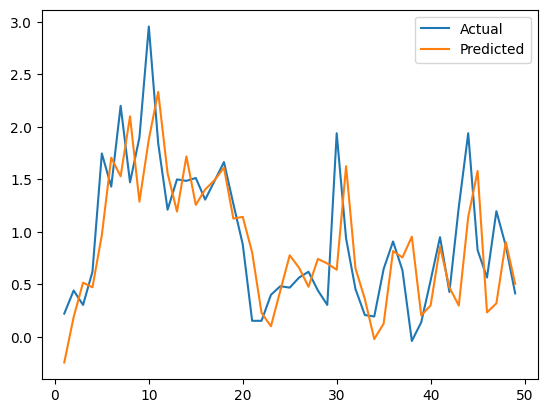

In [97]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [98]:
val_predictions = model10.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,1.827720,1.856604
1,1.828989,1.856604
2,1.822891,1.856604
3,1.822891,1.856604
4,1.822891,1.856604
...,...,...
310,0.554319,0.413705
311,0.929685,0.496156
312,0.853238,0.468672
313,0.801243,0.468672


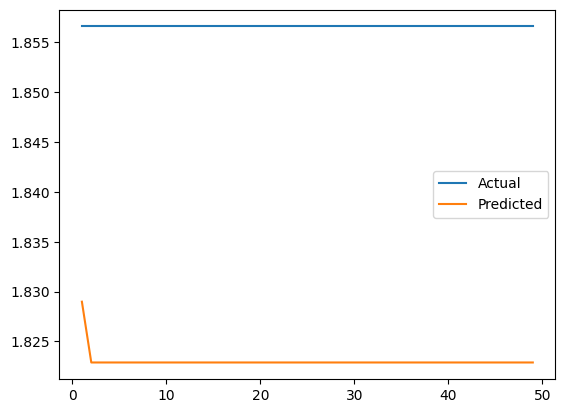

In [99]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [100]:
test_predictions = model10.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,0.849428,0.386221
1,0.969929,0.551124
2,0.849348,0.372479
3,0.673300,0.193834
4,0.478283,0.125125
...,...,...
312,-0.324202,-0.397067
313,-0.365201,-0.259648
314,-0.294059,-0.108488
315,-0.268616,-0.108488


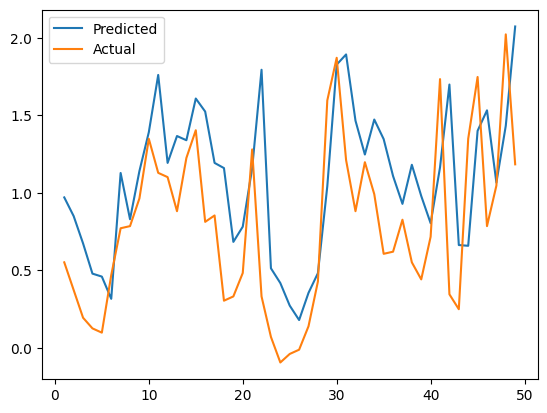

In [101]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()